# Libraries 

In [1]:
import os  
import cv2           
from time import time
 
import pandas as pd
import numpy as np 

from random import shuffle  

from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,silhouette_score, homogeneity_score,adjusted_mutual_info_score,completeness_score,v_measure_score,adjusted_rand_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages as pdf
%matplotlib inline
np.random.seed(123)  # for reproducibility
import theano
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
data_dir='/Users/gowthamkommineni/Desktop/ML/project/101_ObjectCategories' #Set Directory
IMG_Size =50

# Load Images and Preprocessing

In [3]:
def create_categories():    
    train=[]
    b=[]
    i=0
    for categ in os.listdir(data_dir):
        path = os.path.join(data_dir,categ)
        i=i+1
        for img in (os.listdir(path)):
            path2 = os.path.join(path,img)
            if (os.path.exists(path2)):
                gray = cv2.imread(path2,cv2.IMREAD_GRAYSCALE)
                img = cv2.equalizeHist(gray)
                imgb = cv2.GaussianBlur(img,(5,5),0)
                imgb=cv2.resize(imgb,(50,50))
                train.append(imgb)
                b.append(i)
    return train,b


In [4]:
a,b=create_categories()
a=np.array(a)
b=np.array(b)

In [5]:
a,b=shuffle(a,b)
a.shape

(9145, 50, 50)

# Creating Validation datasets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.33, random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6127, 50, 50)
(6127,)
(3018, 50, 50)
(3018,)


In [9]:
max(b)

102

In [10]:
X_train.shape[0]

6127

# Sample Image

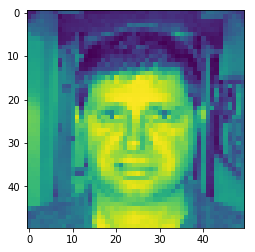

In [11]:
X_train[0]
plt.imshow(a[0])


In [12]:
X_train = X_train.reshape(X_train.shape[0], 1, 50, 50)
X_test = X_test.reshape(X_test.shape[0], 1, 50, 50)
print(X_train.shape)

(6127, 1, 50, 50)


In [13]:
X_train = X_train.reshape(X_train.shape[0], 1, 50, 50)
X_test = X_test.reshape(X_test.shape[0], 1, 50, 50)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [14]:
Y_test.shape

(3018, 103)

# Creating convolutional Model

In [15]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,50,50),dim_ordering='th'))
print(model.output_shape)


(None, 32, 48, 48)


/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), data_format="channels_first", input_shape=(1, 50, 50..., activation="relu")`
  from ipykernel import kernelapp as app


In [16]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(103, activation='softmax'))


/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [17]:
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,50,50),dim_ordering='th'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(103, activation='softmax'))

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), data_format="channels_first", input_shape=(1, 50, 50..., activation="relu")`
  app.launch_new_instance()
/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`


In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Fitting Model

In [27]:
model.fit(X_train, Y_train, batch_size=10, nb_epoch=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)


Epoch 1/10
  10/6127 [..............................] - ETA: 99s - loss: 0.4829 - acc: 0.8000

/Users/gowthamkommineni/anaconda3/lib/python3.5/site-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


6127/6127 [==============================] - 75s - loss: 0.7625 - acc: 0.7712    
Epoch 2/10
6127/6127 [==============================] - 73s - loss: 0.7514 - acc: 0.7697    
Epoch 3/10
6127/6127 [==============================] - 73s - loss: 0.7467 - acc: 0.7761    
Epoch 4/10
6127/6127 [==============================] - 75s - loss: 0.7127 - acc: 0.7855    
Epoch 5/10
6127/6127 [==============================] - 74s - loss: 0.7275 - acc: 0.7808    
Epoch 6/10
6127/6127 [==============================] - 73s - loss: 0.6878 - acc: 0.7819    
Epoch 7/10
6127/6127 [==============================] - 70s - loss: 0.6719 - acc: 0.7965    
Epoch 8/10
6127/6127 [==============================] - 80s - loss: 0.6683 - acc: 0.7955    
Epoch 9/10
6127/6127 [==============================] - 70s - loss: 0.6759 - acc: 0.7952    
Epoch 10/10
6127/6127 [==============================] - 76s - loss: 0.6637 - acc: 0.7994    


In [28]:
score

[3.6988389145229887, 0.45891318750191873]

In [29]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


acc: 45.89%
